In [10]:
import pickle as pkl
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import pearsonr, spearmanr

from chipvi.utils.plots import hist2d

sns.set_theme(style="whitegrid")

In [2]:
def load_data(target):
    target_data_dir = Path(f"/lotterlab/users/abdul/repos/chipvi/{target}_data_v2")
    data = {"train": {}, "val": {}}
    sd_map_data = {}
    for fpath in target_data_dir.glob("*.pkl"):
        if "sd_map" in fpath.stem:
            with open(fpath, "rb") as f:
                sd_dict = pkl.load(f)
                sd_dict = {k.stem.split("_")[0]: v for k, v in sd_dict.items()}
                sd_map_data.update(sd_dict)
        elif "train" in fpath.stem:
            with open(fpath, "rb") as f:
                data["train"][fpath.stem.replace("train_", "")] = pkl.load(f)
            print(f"Loaded {fpath.stem} as train")
        elif "val" in fpath.stem:
            with open(fpath, "rb") as f:
                data["val"][fpath.stem.replace("val_", "")] = pkl.load(f)
            print(f"Loaded {fpath.stem} as val")
        else:
            print(f"Skipping {fpath.stem}")

    train_df = pd.DataFrame(data["train"])
    val_df = pd.DataFrame(data["val"])
    train_df["grp"] = train_df["experiment_seq_depth_r1"].map(dict(zip(train_df["experiment_seq_depth_r1"].unique(), np.arange(train_df["experiment_seq_depth_r1"].nunique()))))
    val_df["grp"] = val_df["experiment_seq_depth_r1"].map(dict(zip(val_df["experiment_seq_depth_r1"].unique(), np.arange(val_df["experiment_seq_depth_r1"].nunique()))))

    return train_df, val_df, sd_map_data

# H3k27me3

In [3]:
train_df_h3, val_df_h3, sd_map_data_h3 = load_data("h3k27me3")

Loaded val_control_mapq_r1 as val
Loaded val_control_reads_r1 as val
Loaded val_experiment_seq_depth_r1 as val
Loaded train_experiment_seq_depth_r1 as train
Loaded val_experiment_reads_r1 as val
Loaded val_experiment_mapq_r2 as val
Loaded train_experiment_reads_r2 as train
Loaded train_control_mapq_r1 as train
Loaded train_control_reads_r2 as train
Loaded train_control_seq_depth_r1 as train
Loaded train_experiment_mapq_r1 as train
Loaded val_control_seq_depth_r1 as val
Loaded train_control_seq_depth_r2 as train
Loaded train_experiment_mapq_r2 as train
Loaded val_control_seq_depth_r2 as val
Loaded train_control_mapq_r2 as train
Loaded train_control_reads_r1 as train
Loaded train_experiment_seq_depth_r2 as train
Loaded val_experiment_reads_r2 as val
Loaded val_experiment_mapq_r1 as val
Loaded train_experiment_reads_r1 as train
Loaded val_control_reads_r2 as val
Loaded val_control_mapq_r2 as val
Loaded val_experiment_seq_depth_r2 as val


In [4]:
sd_map_data_h3

{'ENCFF472BNU': 2.7108896,
 'ENCFF072GIZ': 2.9753063,
 'ENCFF180HWA': 1.860223,
 'ENCFF573JBB': 2.4759176,
 'ENCFF649TIN': 4.4458337,
 'ENCFF067UUF': 3.1301816,
 'ENCFF725GVZ': 5.861787,
 'ENCFF690EXZ': 3.5666697,
 'ENCFF178EFV': 1.6187156,
 'ENCFF853XPL': 2.6514263,
 'ENCFF310CQJ': 2.7022052,
 'ENCFF944CDT': 1.799159,
 'ENCFF424VUU': 3.2863982,
 'ENCFF607IHR': 2.2111273,
 'ENCFF878FWL': 1.5796864,
 'ENCFF681BQQ': 2.0024695,
 'ENCFF031GGF': 1.8112426,
 'ENCFF059QIZ': 1.7756149,
 'ENCFF070HEW': 1.8426452,
 'ENCFF867XJZ': 2.5915356,
 'ENCFF649QVR': 1.2338}

In [5]:
train_df_h3

,experiment_seq_depth_r1,experiment_reads_r2,control_mapq_r1,control_reads_r2,control_seq_depth_r1,experiment_mapq_r1,control_seq_depth_r2,experiment_mapq_r2,control_mapq_r2,control_reads_r1,experiment_seq_depth_r2,experiment_reads_r1,grp
0,2.710890,1.0,1.000000,0.0,2.975306,0.999000,2.975306,0.999,1.000000,0.0,1.860223,1.0,0
1,2.710890,1.0,1.000000,0.0,2.975306,0.999000,2.975306,0.999,1.000000,0.0,1.860223,1.0,0
2,2.710890,1.0,0.999831,3.0,2.975306,0.999000,2.975306,0.999,0.999831,3.0,1.860223,1.0,0
3,2.710890,1.0,0.999888,4.0,2.975306,0.999000,2.975306,0.999,0.999888,4.0,1.860223,1.0,0
4,2.710890,0.0,0.999890,5.0,2.975306,0.999937,2.975306,1.000,0.999890,5.0,1.860223,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15145536,1.842645,1.0,0.999000,2.0,2.591536,0.999000,2.591536,0.999,0.999000,2.0,1.233800,3.0,6
15145537,1.842645,1.0,0.999000,3.0,2.591536,0.999000,2.591536,0.999,0.999000,3.0,1.233800,5.0,6
15145538,1.842645,1.0,0.999436,4.0,2.591536,0.999000,2.591536,0.999,0.999436,4.0,1.233800,3.0,6
15145539,1.842645,1.0,0.999555,3.0,2.591536,0.999000,2.591536,0.999,0.999555,3.0,1.233800,3.0,6


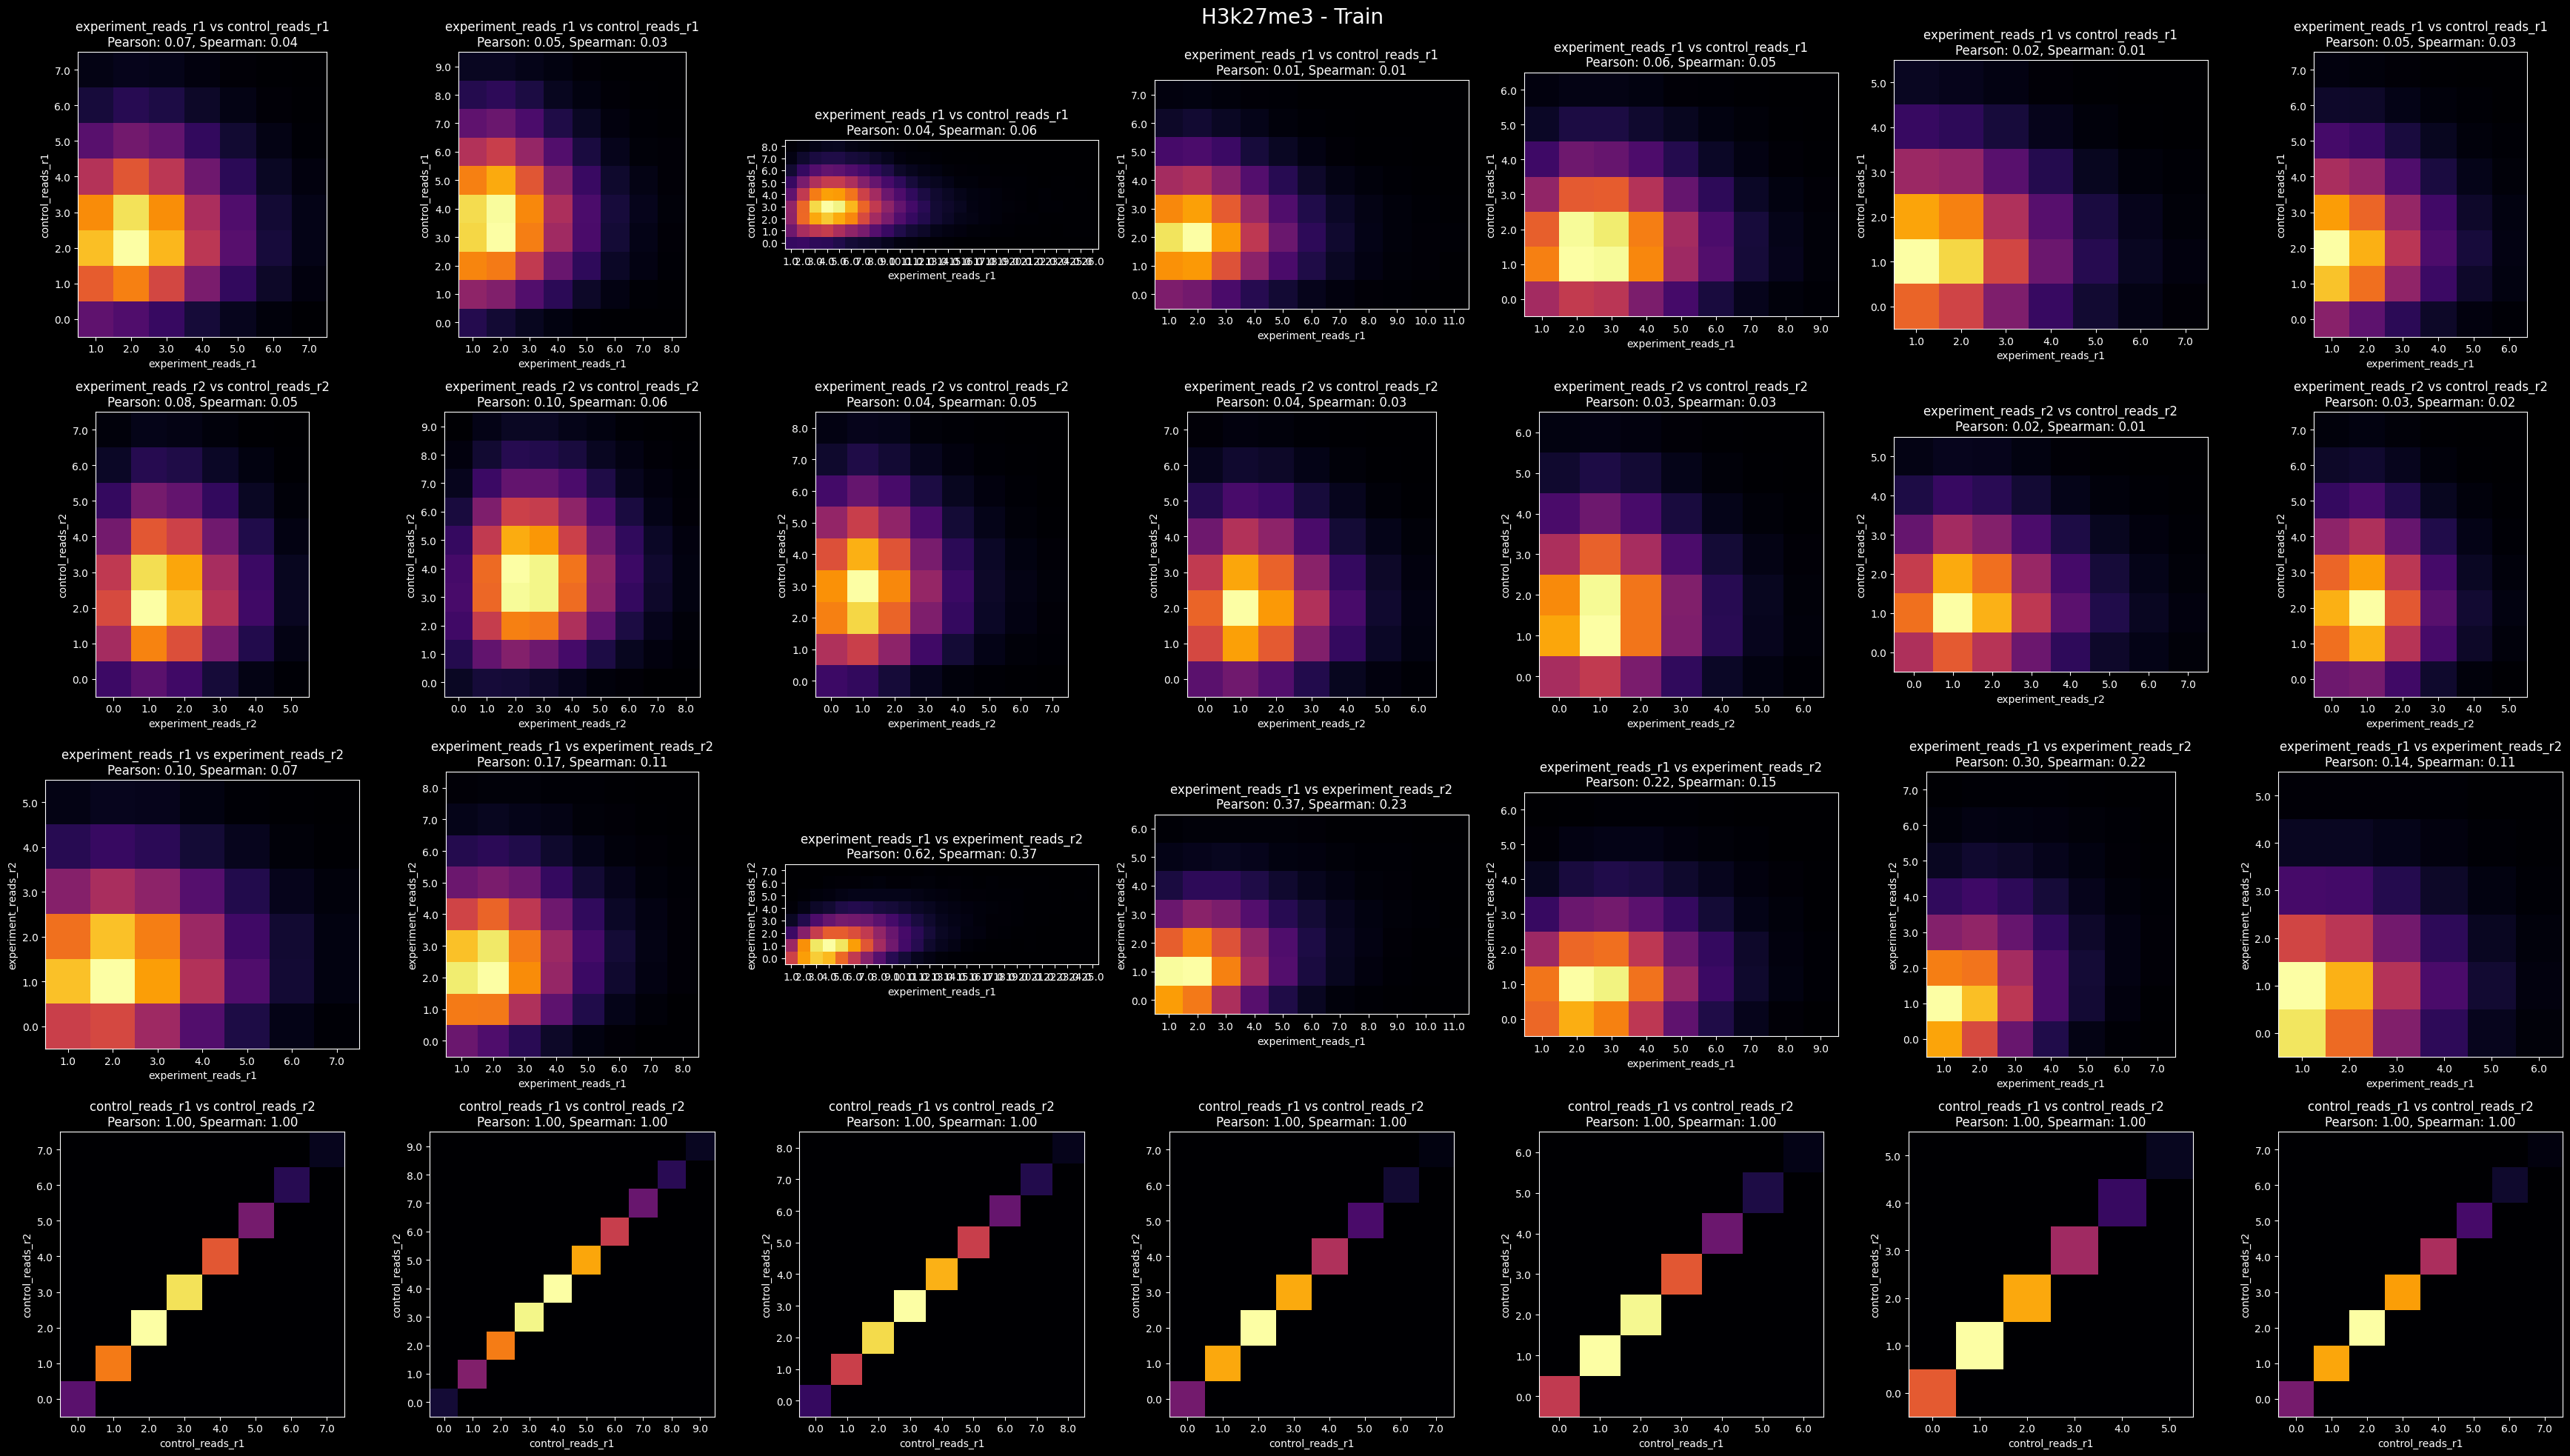

In [6]:
np.random.seed(42)

fig, axes = plt.subplots(4, train_df_h3["grp"].nunique(), figsize=(35, 20))

for grp_idx, grp_df in train_df_h3.groupby("grp"):
    grp_axes = axes[:, grp_idx].flatten()

    hist2d(grp_df, "experiment_reads_r1", "control_reads_r1", grp_axes[0])
    hist2d(grp_df, "experiment_reads_r2", "control_reads_r2", grp_axes[1])
    hist2d(grp_df, "experiment_reads_r1", "experiment_reads_r2", grp_axes[2])
    hist2d(grp_df, "control_reads_r1", "control_reads_r2", grp_axes[3])

fig.suptitle("H3k27me3 - Train", fontsize=20)
fig.tight_layout()

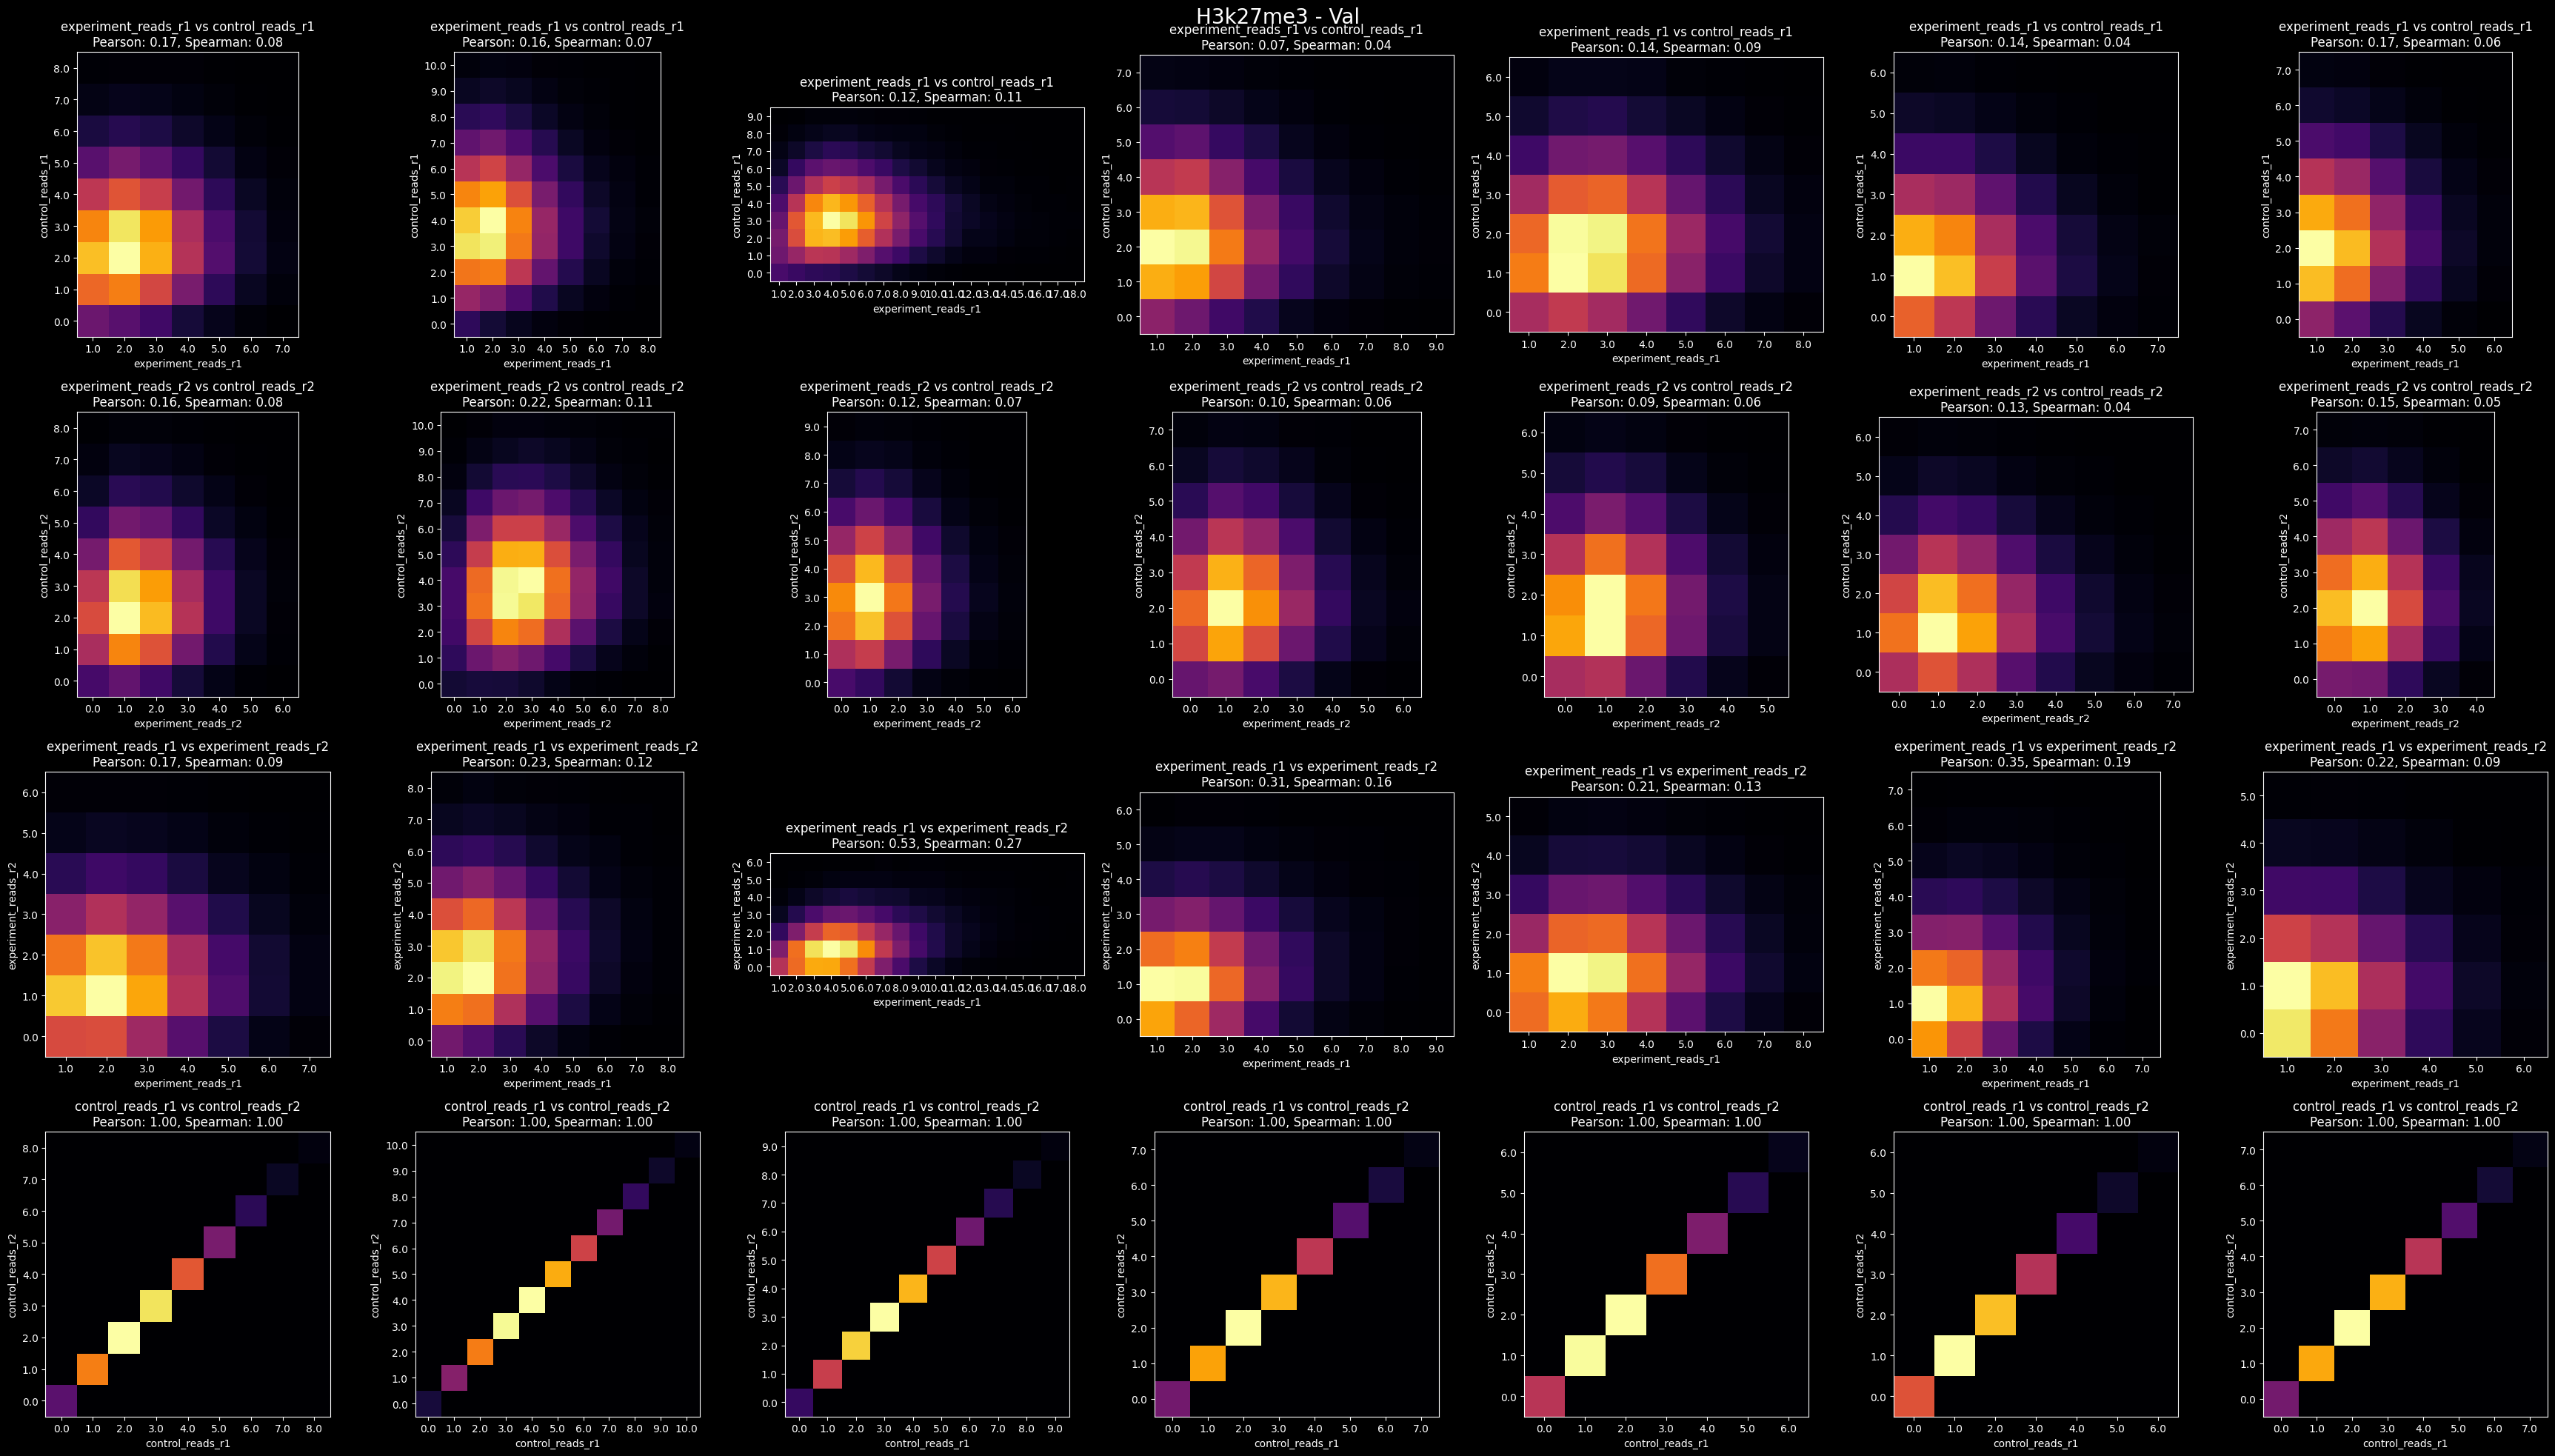

In [7]:
np.random.seed(42)

fig, axes = plt.subplots(4, val_df_h3["grp"].nunique(), figsize=(35, 20))

for grp_idx, grp_df in val_df_h3.groupby("grp"):
    grp_axes = axes[:, grp_idx].flatten()

    hist2d(grp_df, "experiment_reads_r1", "control_reads_r1", grp_axes[0])
    hist2d(grp_df, "experiment_reads_r2", "control_reads_r2", grp_axes[1])
    hist2d(grp_df, "experiment_reads_r1", "experiment_reads_r2", grp_axes[2])
    hist2d(grp_df, "control_reads_r1", "control_reads_r2", grp_axes[3])

fig.suptitle("H3k27me3 - Val", fontsize=20)
fig.tight_layout()

In [8]:
train_df_h3

,experiment_seq_depth_r1,experiment_reads_r2,control_mapq_r1,control_reads_r2,control_seq_depth_r1,experiment_mapq_r1,control_seq_depth_r2,experiment_mapq_r2,control_mapq_r2,control_reads_r1,experiment_seq_depth_r2,experiment_reads_r1,grp
0,2.710890,1.0,1.000000,0.0,2.975306,0.999000,2.975306,0.999,1.000000,0.0,1.860223,1.0,0
1,2.710890,1.0,1.000000,0.0,2.975306,0.999000,2.975306,0.999,1.000000,0.0,1.860223,1.0,0
2,2.710890,1.0,0.999831,3.0,2.975306,0.999000,2.975306,0.999,0.999831,3.0,1.860223,1.0,0
3,2.710890,1.0,0.999888,4.0,2.975306,0.999000,2.975306,0.999,0.999888,4.0,1.860223,1.0,0
4,2.710890,0.0,0.999890,5.0,2.975306,0.999937,2.975306,1.000,0.999890,5.0,1.860223,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15145536,1.842645,1.0,0.999000,2.0,2.591536,0.999000,2.591536,0.999,0.999000,2.0,1.233800,3.0,6
15145537,1.842645,1.0,0.999000,3.0,2.591536,0.999000,2.591536,0.999,0.999000,3.0,1.233800,5.0,6
15145538,1.842645,1.0,0.999436,4.0,2.591536,0.999000,2.591536,0.999,0.999436,4.0,1.233800,3.0,6
15145539,1.842645,1.0,0.999555,3.0,2.591536,0.999000,2.591536,0.999,0.999555,3.0,1.233800,3.0,6


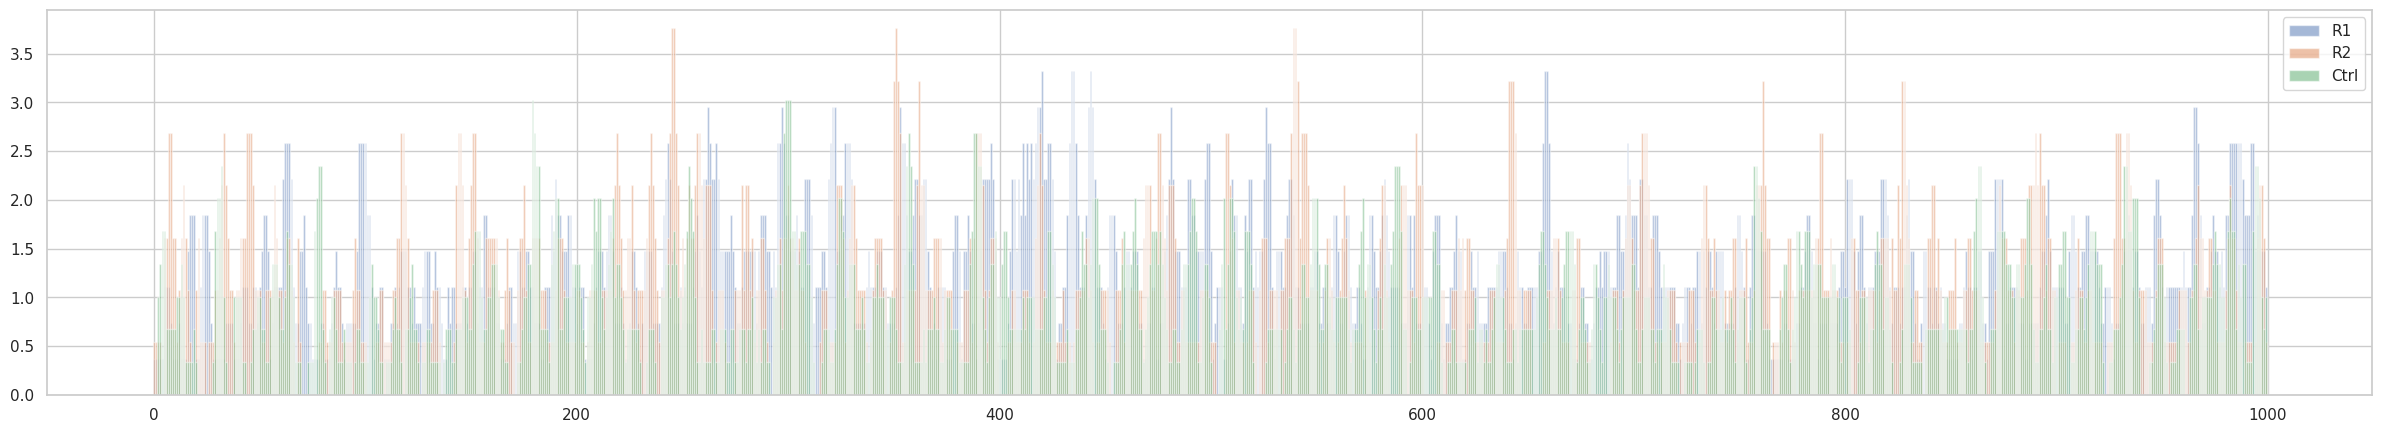

In [13]:
fig, ax = plt.subplots(figsize=(30, 5))
sample = train_df_h3.iloc[:1_000]
ax.bar(np.arange(sample.shape[0]), sample["experiment_reads_r1"] / sample["experiment_seq_depth_r1"], label="R1", alpha=0.5)
ax.bar(np.arange(sample.shape[0]), sample["experiment_reads_r2"] / sample["experiment_seq_depth_r2"], label="R2", alpha=0.5)
ax.bar(np.arange(sample.shape[0]), sample["control_reads_r1"] / sample["control_seq_depth_r1"], label="Ctrl", alpha=0.5)
ax.legend()

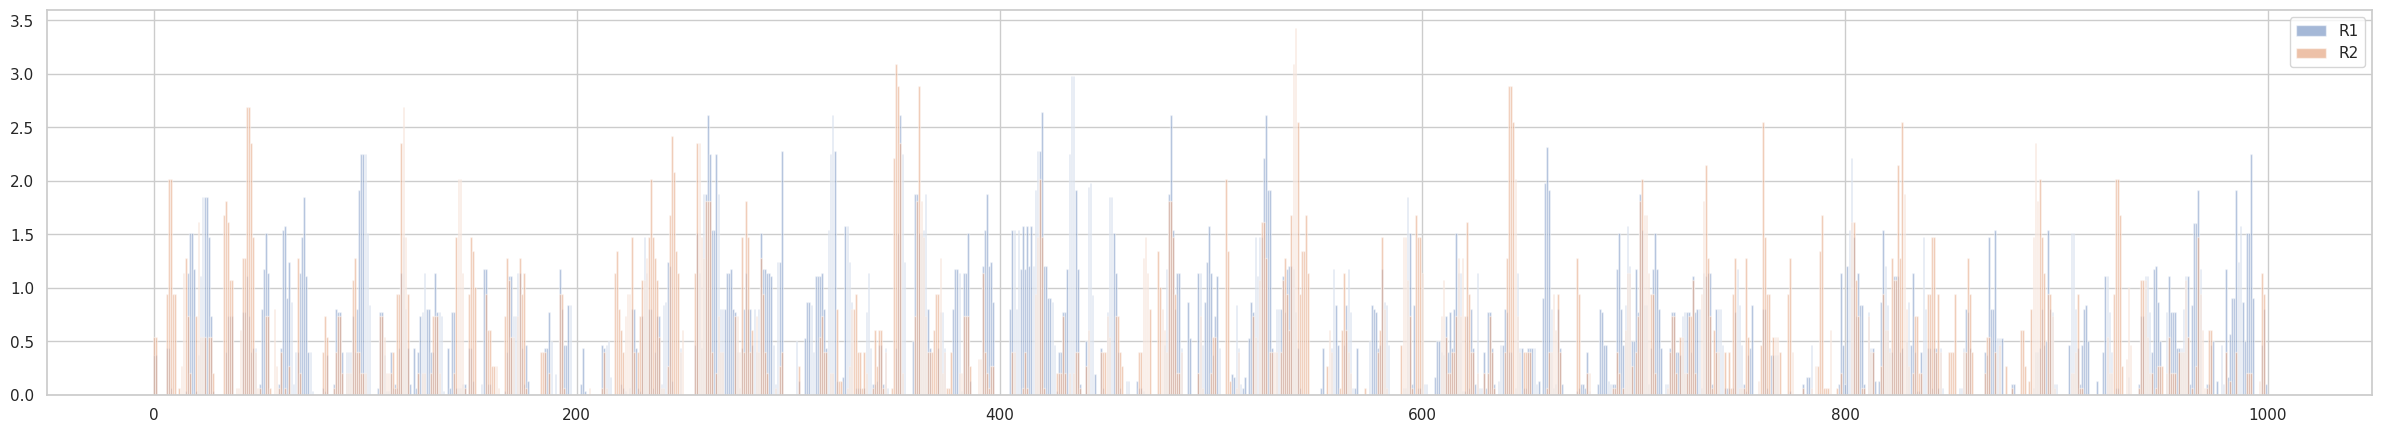

In [15]:
fig, ax = plt.subplots(figsize=(30, 5))
sample = train_df_h3.iloc[:1_000]
ax.bar(np.arange(sample.shape[0]), ((sample["experiment_reads_r1"] / sample["experiment_seq_depth_r1"]) - (sample["control_reads_r1"] / sample["control_seq_depth_r1"])).clip(0), label="R1", alpha=0.5)
ax.bar(np.arange(sample.shape[0]), ((sample["experiment_reads_r2"] / sample["experiment_seq_depth_r2"]) - (sample["control_reads_r2"] / sample["control_seq_depth_r2"])).clip(0), label="R2", alpha=0.5)
ax.legend()

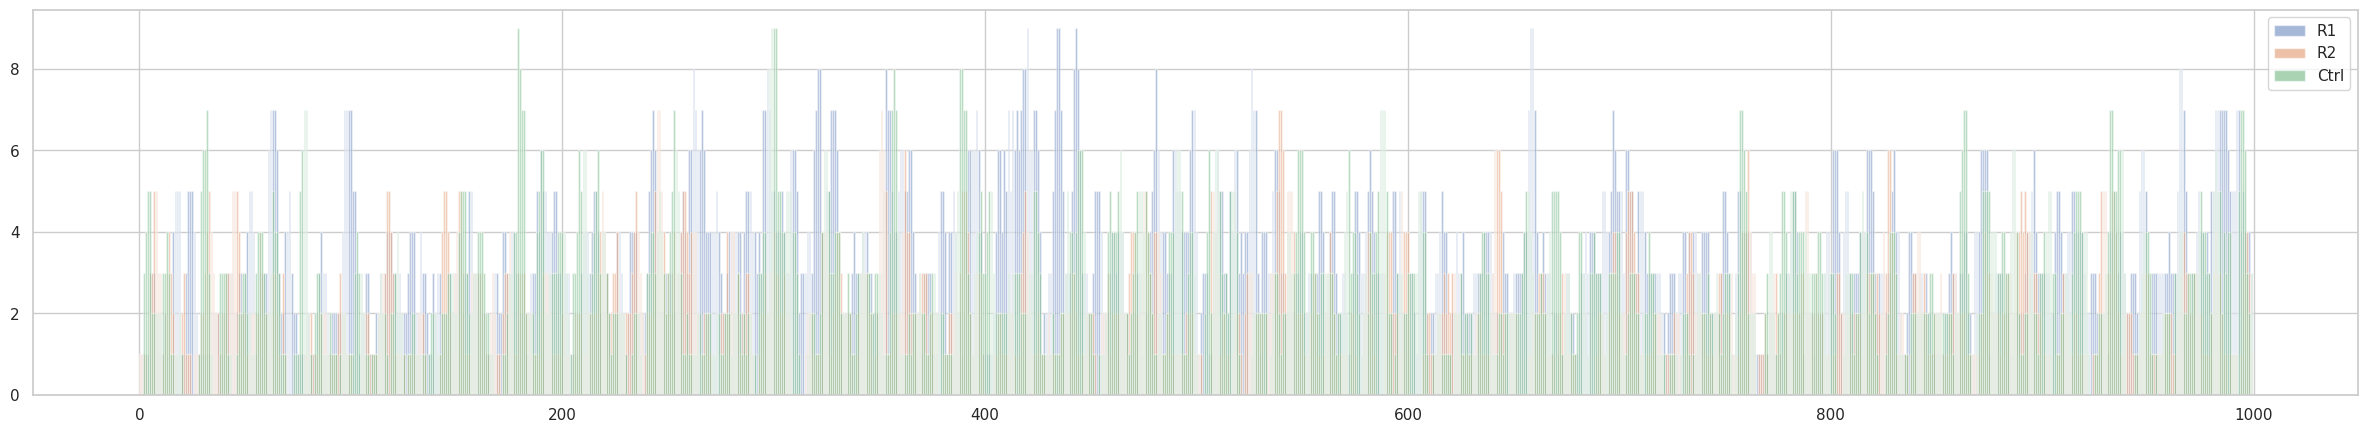

In [16]:
fig, ax = plt.subplots(figsize=(30, 5))
sample = train_df_h3.iloc[:1_000]
ax.bar(np.arange(sample.shape[0]), sample["experiment_reads_r1"], label="R1", alpha=0.5)
ax.bar(np.arange(sample.shape[0]), sample["experiment_reads_r2"], label="R2", alpha=0.5)
ax.bar(np.arange(sample.shape[0]), sample["control_reads_r1"], label="Ctrl", alpha=0.5)
ax.legend()

/lotterlab/users/abdul/miniconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


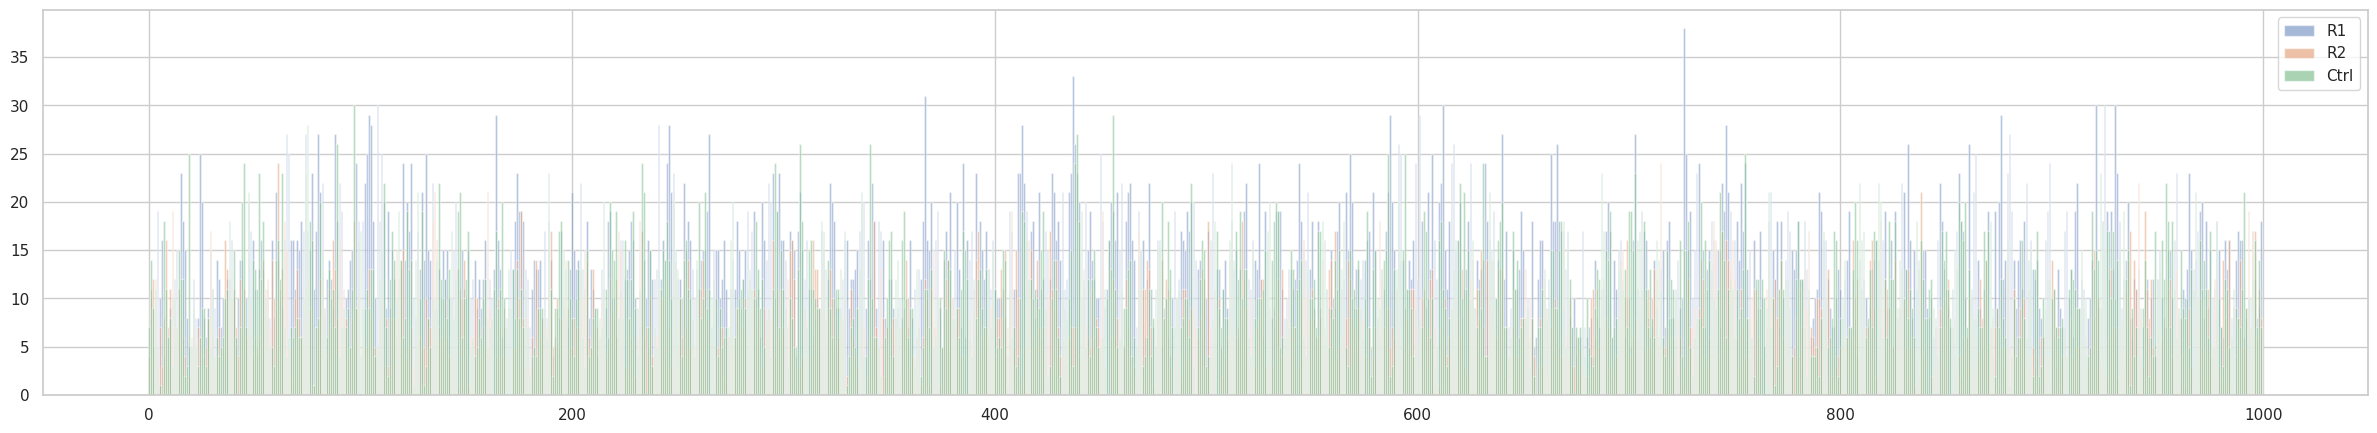

In [17]:
fig, ax = plt.subplots(figsize=(30, 5))
sample = train_df_h3.iloc[:4_000]
# Sum every 4 rows
sample_r1 = sample["experiment_reads_r1"].values.reshape(-1, 4).sum(axis=1)
sample_r2 = sample["experiment_reads_r2"].values.reshape(-1, 4).sum(axis=1)
sample_ctrl = sample["control_reads_r1"].values.reshape(-1, 4).sum(axis=1)

ax.bar(np.arange(len(sample_r1)), sample_r1, label="R1", alpha=0.5)
ax.bar(np.arange(len(sample_r2)), sample_r2, label="R2", alpha=0.5)
ax.bar(np.arange(len(sample_ctrl)), sample_ctrl, label="Ctrl", alpha=0.5)
ax.legend()

,r1,r2,ctrl,r1_clip,r2_clip
0,15.861951,22.577938,15.460592,0.401359,7.117346
1,15.493069,22.040367,12.099596,3.393473,9.940771
2,21.026306,29.566345,14.452294,6.574012,15.114051
3,25.452900,10.751399,18.149393,7.303507,0.000000
4,21.395191,16.664667,9.410795,11.984396,7.253872
...,...,...,...,...,...
995,28.035076,22.040367,16.132793,11.902283,5.907574
996,36.888260,16.664669,15.124494,21.763767,1.540175
997,27.297310,22.040367,30.248989,0.000000,0.000000
998,23.977369,21.502796,19.157692,4.819677,2.345104


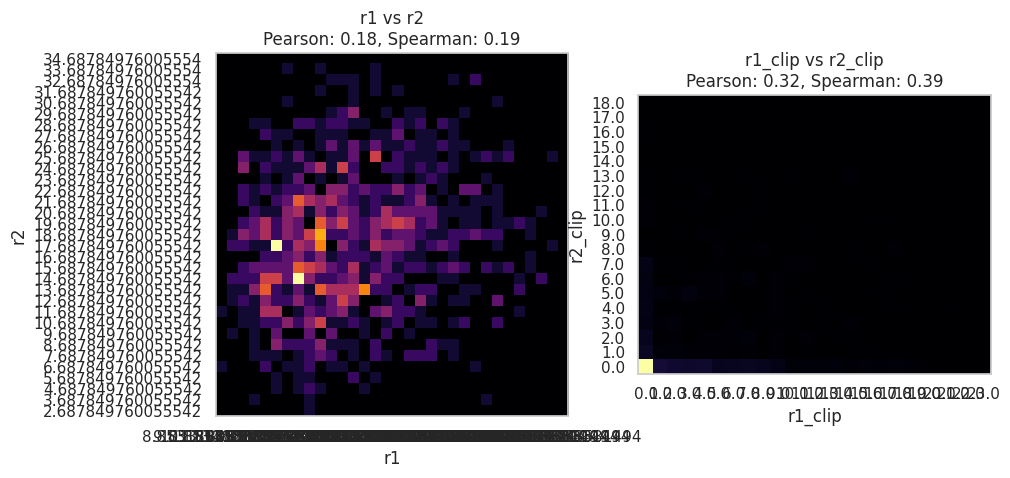

In [36]:
sample = train_df_h3.iloc[:20_000]
reads_r1_normed = (sample["experiment_reads_r1"] / sample["experiment_seq_depth_r1"]).values.reshape(-1, 20).sum(axis=1)
reads_r2_normed = (sample["experiment_reads_r2"] / sample["experiment_seq_depth_r2"]).values.reshape(-1, 20).sum(axis=1)
reads_ctrl_normed = (sample["control_reads_r1"] / sample["control_seq_depth_r1"]).values.reshape(-1, 20).sum(axis=1)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
tmp_df = pd.DataFrame({"r1": reads_r1_normed, "r2": reads_r2_normed, "ctrl": reads_ctrl_normed})
tmp_df["r1_clip"] = (tmp_df["r1"] - tmp_df["ctrl"]).clip(lower=0)
tmp_df["r2_clip"] = (tmp_df["r2"] - tmp_df["ctrl"]).clip(lower=0)
display(tmp_df)
hist2d(tmp_df, "r1", "r2", axes[0], sample_size=len(reads_r1_normed))
hist2d(tmp_df, "r1_clip", "r2_clip", axes[1], sample_size=len(reads_r1_normed))


In [39]:
tmp_df.describe()

,r1,r2,ctrl,r1_clip,r2_clip
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,21.124430,18.663889,18.427681,4.663923,3.017963
std,6.586183,6.112231,4.722811,5.731408,4.467990
min,8.853181,2.687850,6.385897,0.000000,0.000000
25%,16.230833,14.514388,15.124494,0.000000,0.000000
50%,19.919661,18.277378,18.485491,2.434349,0.129883
75%,25.452898,22.577936,21.510391,7.791342,5.186430
max,54.594620,40.317745,36.298790,30.075882,20.693121


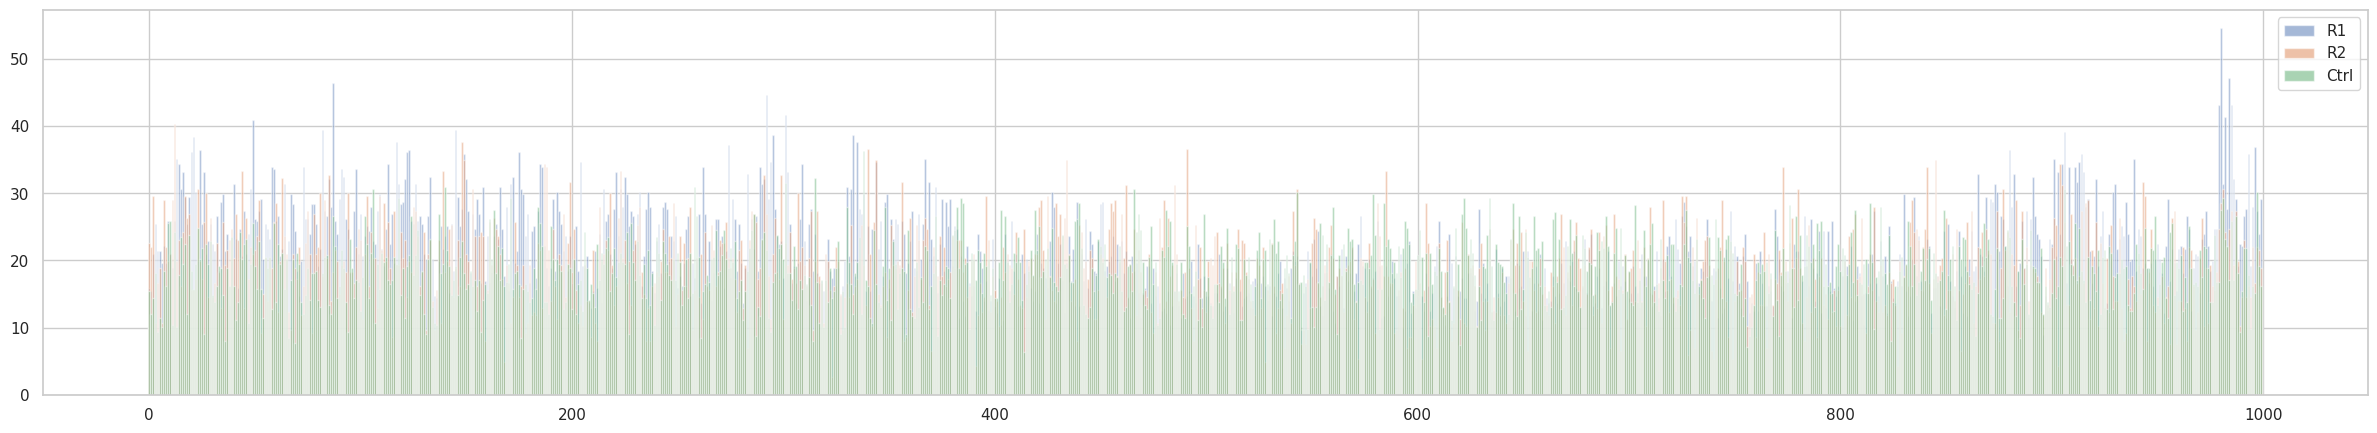

In [38]:
fig, ax = plt.subplots(figsize=(30, 5))

ax.bar(np.arange(tmp_df.shape[0]), tmp_df["r1"], label="R1", alpha=0.5)
ax.bar(np.arange(tmp_df.shape[0]), tmp_df["r2"], label="R2", alpha=0.5)
ax.bar(np.arange(tmp_df.shape[0]), tmp_df["ctrl"], label="Ctrl", alpha=0.5)
ax.legend()

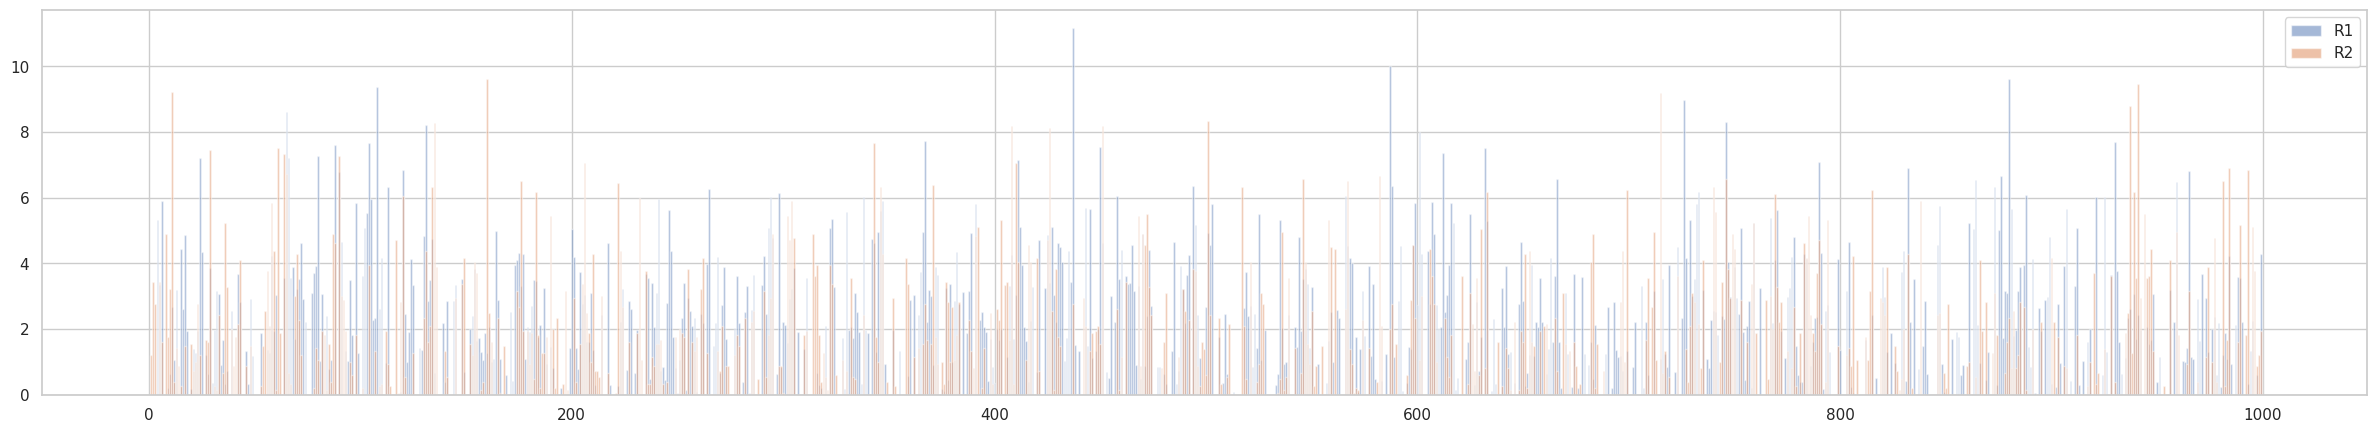

In [34]:
fig, ax = plt.subplots(figsize=(30, 5))

ax.bar(np.arange(tmp_df.shape[0]), tmp_df["r1_clip"], label="R1", alpha=0.5)
ax.bar(np.arange(tmp_df.shape[0]), tmp_df["r2_clip"], label="R2", alpha=0.5)
ax.legend()

# CTCF

In [8]:
train_df_c, val_df_c, sd_map_data_c = load_data("ctcf")

train_df_c.head()

Loaded val_experiment_reads_r1 as val
Loaded train_control_reads_r2 as train
Loaded val_experiment_seq_depth_r2 as val
Loaded train_experiment_seq_depth_r2 as train
Loaded val_experiment_mapq_r2 as val


Loaded train_experiment_reads_r2 as train
Loaded train_control_mapq_r2 as train
Loaded train_control_seq_depth_r1 as train
Loaded val_control_reads_r2 as val
Loaded train_experiment_mapq_r1 as train
Loaded val_control_seq_depth_r1 as val
Loaded val_control_mapq_r1 as val
Loaded train_experiment_mapq_r2 as train
Loaded val_control_seq_depth_r2 as val
Loaded val_control_mapq_r2 as val
Loaded train_experiment_reads_r1 as train
Loaded val_experiment_mapq_r1 as val
Loaded train_control_mapq_r1 as train
Loaded train_control_seq_depth_r2 as train
Loaded val_control_reads_r1 as val
Loaded train_control_reads_r1 as train
Loaded val_experiment_seq_depth_r1 as val
Loaded train_experiment_seq_depth_r1 as train
Loaded val_experiment_reads_r2 as val


,control_reads_r2,experiment_seq_depth_r2,experiment_reads_r2,control_mapq_r2,control_seq_depth_r1,experiment_mapq_r1,experiment_mapq_r2,experiment_reads_r1,control_mapq_r1,control_seq_depth_r2,control_reads_r1,experiment_seq_depth_r1,grp
0,0.0,2.455705,0.0,1.0,2.493534,0.999937,1.000000,2.0,0.999176,2.898569,5.0,2.608079,0
1,0.0,2.455705,0.0,1.0,2.493534,0.999937,1.000000,2.0,0.999257,2.898569,4.0,2.608079,0
2,0.0,2.455705,1.0,1.0,2.493534,0.999937,0.999937,3.0,0.999937,2.898569,2.0,2.608079,0
3,0.0,2.455705,1.0,1.0,2.493534,0.999937,0.999937,3.0,0.999937,2.898569,3.0,2.608079,0
4,0.0,2.455705,1.0,1.0,2.493534,0.999937,0.999937,2.0,0.999937,2.898569,3.0,2.608079,0


In [9]:
sd_map_data_c

{'ENCFF480IGS': 2.6080794,
 'ENCFF987LTC': 2.4935343,
 'ENCFF775BDI': 2.4557052,
 'ENCFF763OFL': 2.8985693,
 'ENCFF155MMC': 2.5137513,
 'ENCFF539YXJ': 4.6250277,
 'ENCFF091TGN': 2.6151478,
 'ENCFF140GGU': 2.8718174,
 'ENCFF929RZS': 3.209168,
 'ENCFF558OZB': 3.0171797,
 'ENCFF124DQW': 1.8924361,
 'ENCFF831CSZ': 2.8803475,
 'ENCFF313ZUB': 2.5240996,
 'ENCFF187IST': 3.7808568,
 'ENCFF538HKE': 2.7885425,
 'ENCFF280ZBT': 2.2548304,
 'ENCFF918JDZ': 2.5921915,
 'ENCFF776PWW': 2.3897903,
 'ENCFF828JJG': 2.7807274,
 'ENCFF060PDY': 3.0629447,
 'ENCFF732TAK': 1.7557931,
 'ENCFF287NNF': 3.6670272,
 'ENCFF968GDZ': 1.4022508,
 'ENCFF635YRM': 2.593299,
 'ENCFF411CVS': 1.1999631,
 'ENCFF935TSY': 2.1093934,
 'ENCFF478KSG': 5.5967336,
 'ENCFF883FQV': 3.8889303,
 'ENCFF843CLF': 2.6293964,
 'ENCFF130HMQ': 2.7585857,
 'ENCFF835JPE': 1.793976,
 'ENCFF867XJZ': 2.5915356}

In [10]:
train_df_c

,control_reads_r2,experiment_seq_depth_r2,experiment_reads_r2,control_mapq_r2,control_seq_depth_r1,experiment_mapq_r1,experiment_mapq_r2,experiment_reads_r1,control_mapq_r1,control_seq_depth_r2,control_reads_r1,experiment_seq_depth_r1,grp
0,0.0,2.455705,0.0,1.000000,2.493534,0.999937,1.000000,2.0,0.999176,2.898569,5.0,2.608079,0
1,0.0,2.455705,0.0,1.000000,2.493534,0.999937,1.000000,2.0,0.999257,2.898569,4.0,2.608079,0
2,0.0,2.455705,1.0,1.000000,2.493534,0.999937,0.999937,3.0,0.999937,2.898569,2.0,2.608079,0
3,0.0,2.455705,1.0,1.000000,2.493534,0.999937,0.999937,3.0,0.999937,2.898569,3.0,2.608079,0
4,0.0,2.455705,1.0,1.000000,2.493534,0.999937,0.999937,2.0,0.999937,2.898569,3.0,2.608079,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15881641,5.0,1.793976,2.0,0.999000,2.758586,0.999000,0.999518,5.0,0.999729,2.591536,3.0,2.629396,7
15881642,4.0,1.793976,4.0,0.999329,2.758586,0.999000,0.999727,5.0,0.999729,2.591536,3.0,2.629396,7
15881643,3.0,1.793976,5.0,0.999438,2.758586,0.999000,0.999763,4.0,0.999701,2.591536,4.0,2.629396,7
15881644,1.0,1.793976,5.0,0.999749,2.758586,0.999000,0.999770,2.0,0.999604,2.591536,5.0,2.629396,7


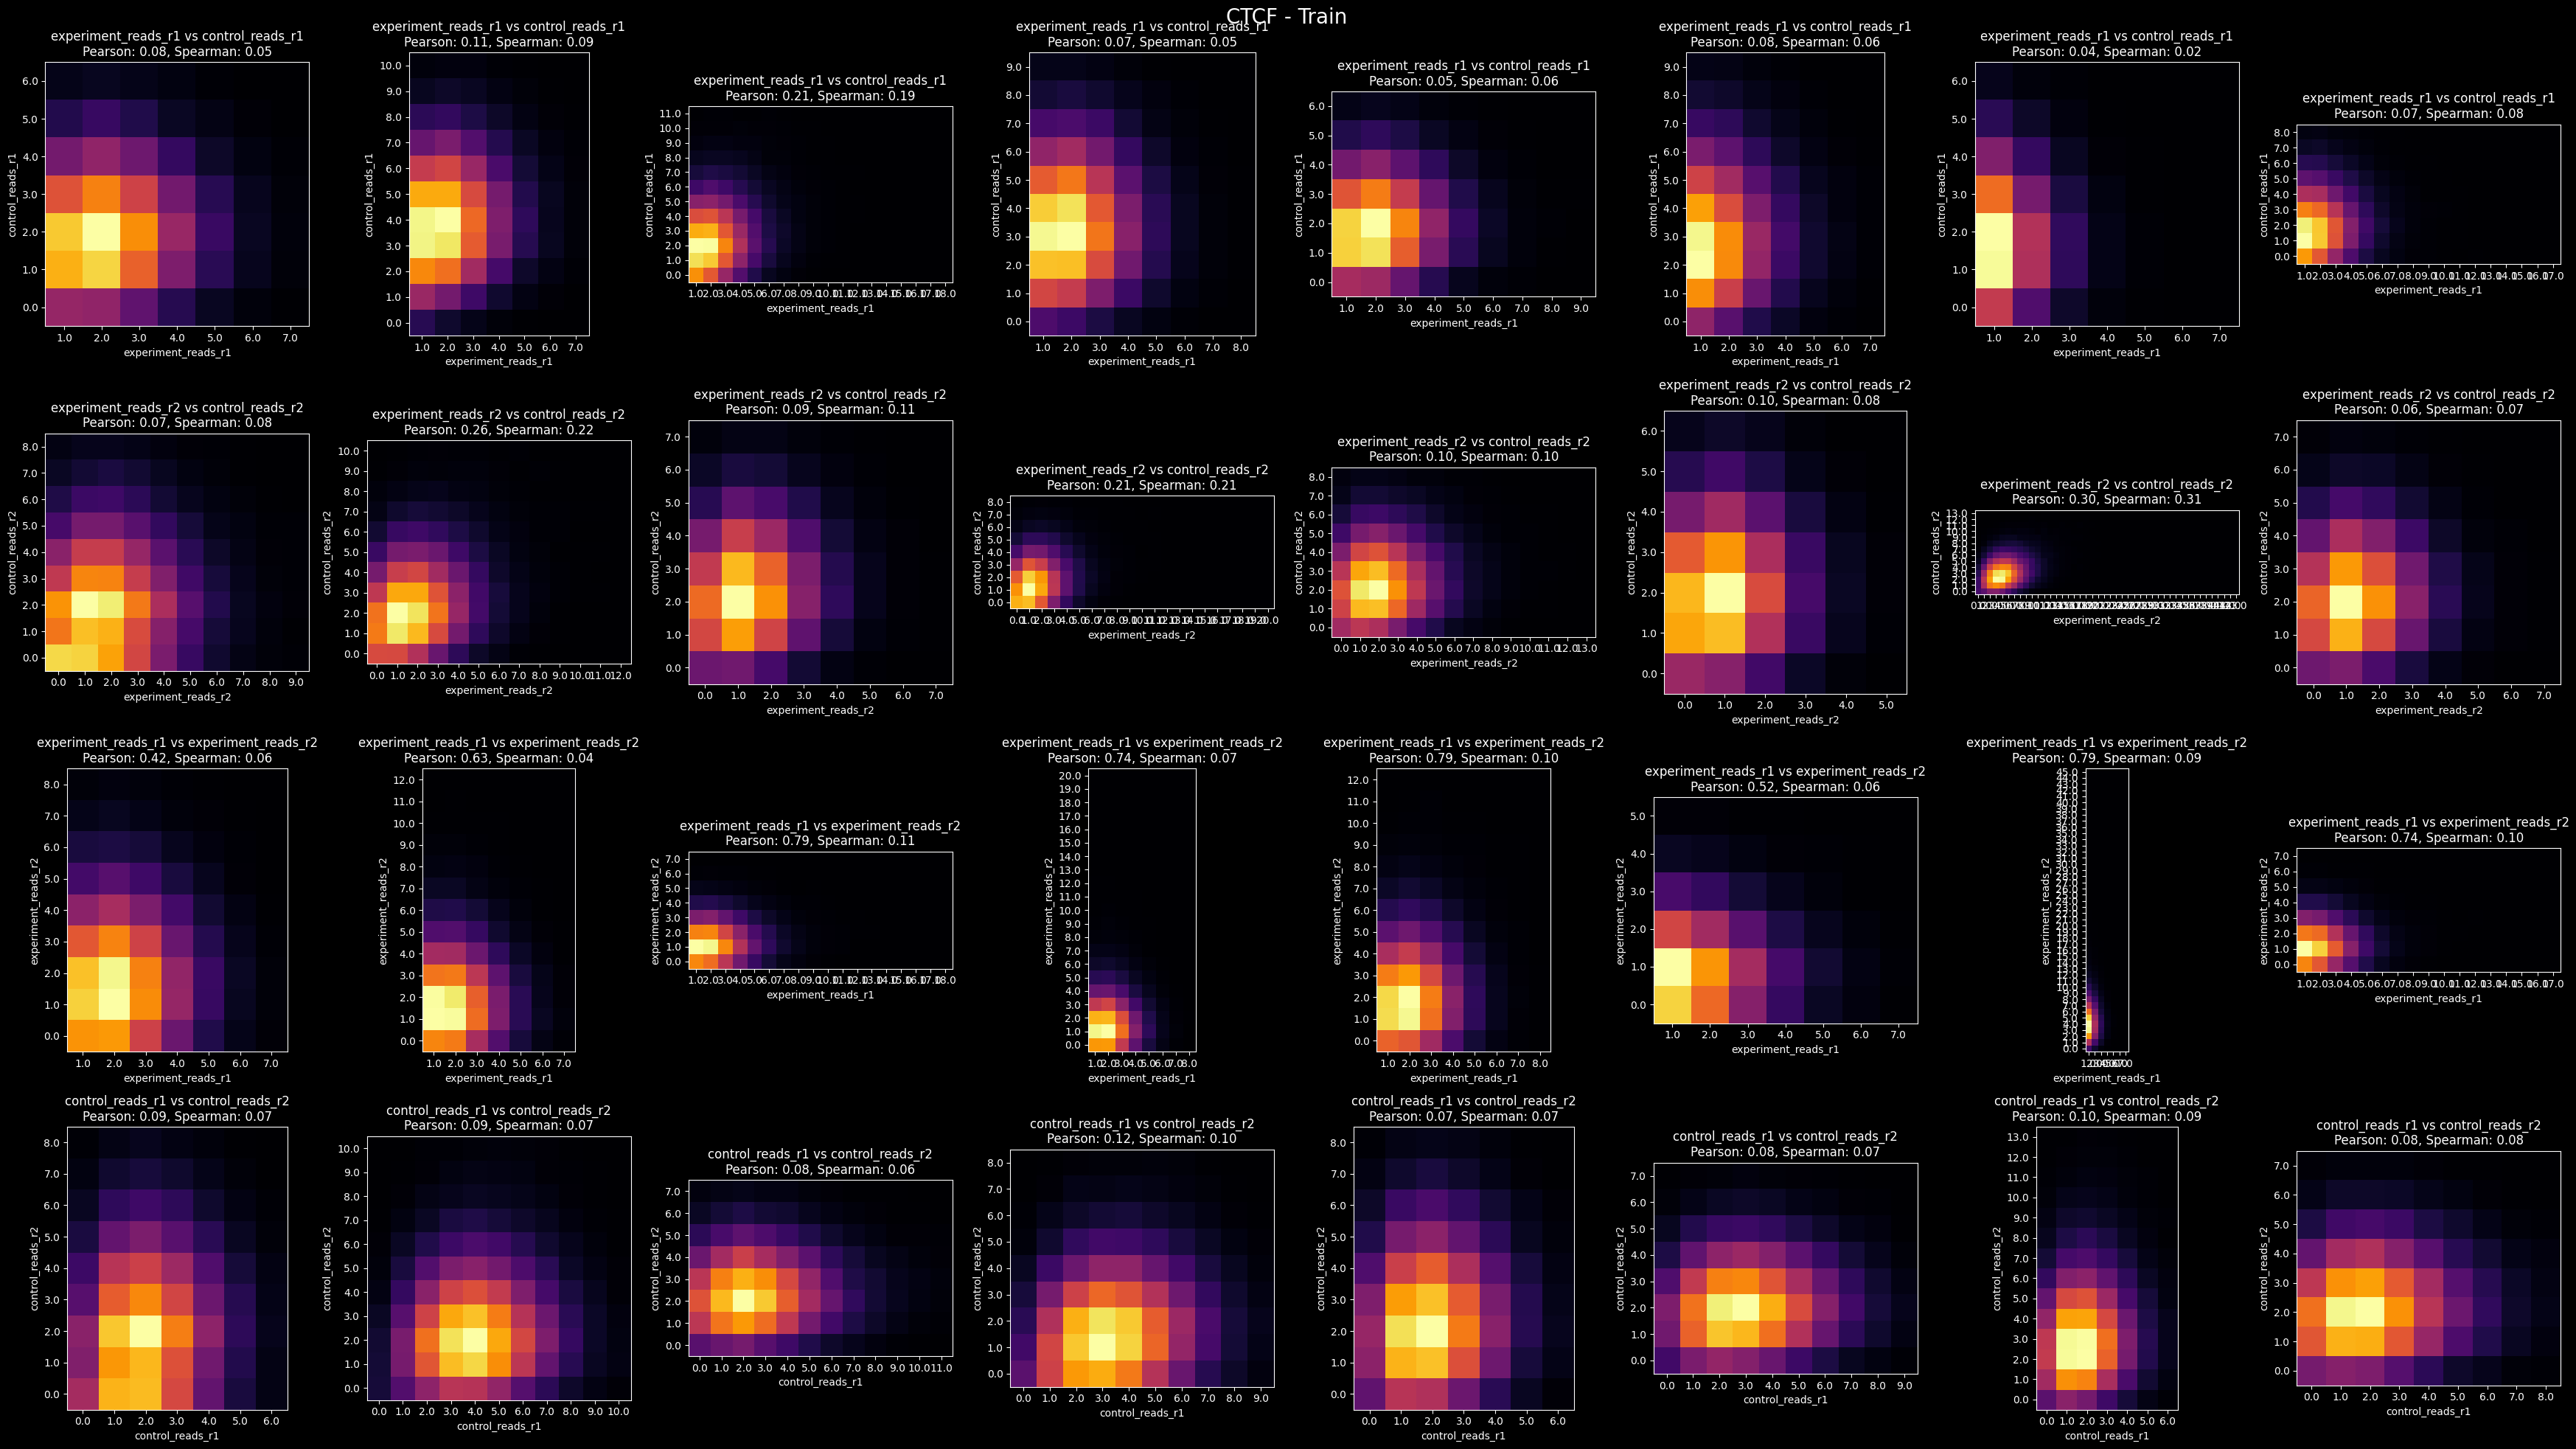

In [11]:
np.random.seed(42)

fig, axes = plt.subplots(4, train_df_c["grp"].nunique(), figsize=(35, 20))

for grp_idx, grp_df in train_df_c.groupby("grp"):
    grp_axes = axes[:, grp_idx].flatten()

    hist2d(grp_df, "experiment_reads_r1", "control_reads_r1", grp_axes[0])
    hist2d(grp_df, "experiment_reads_r2", "control_reads_r2", grp_axes[1])
    hist2d(grp_df, "experiment_reads_r1", "experiment_reads_r2", grp_axes[2])
    hist2d(grp_df, "control_reads_r1", "control_reads_r2", grp_axes[3])

fig.suptitle("CTCF - Train", fontsize=20)
fig.tight_layout()

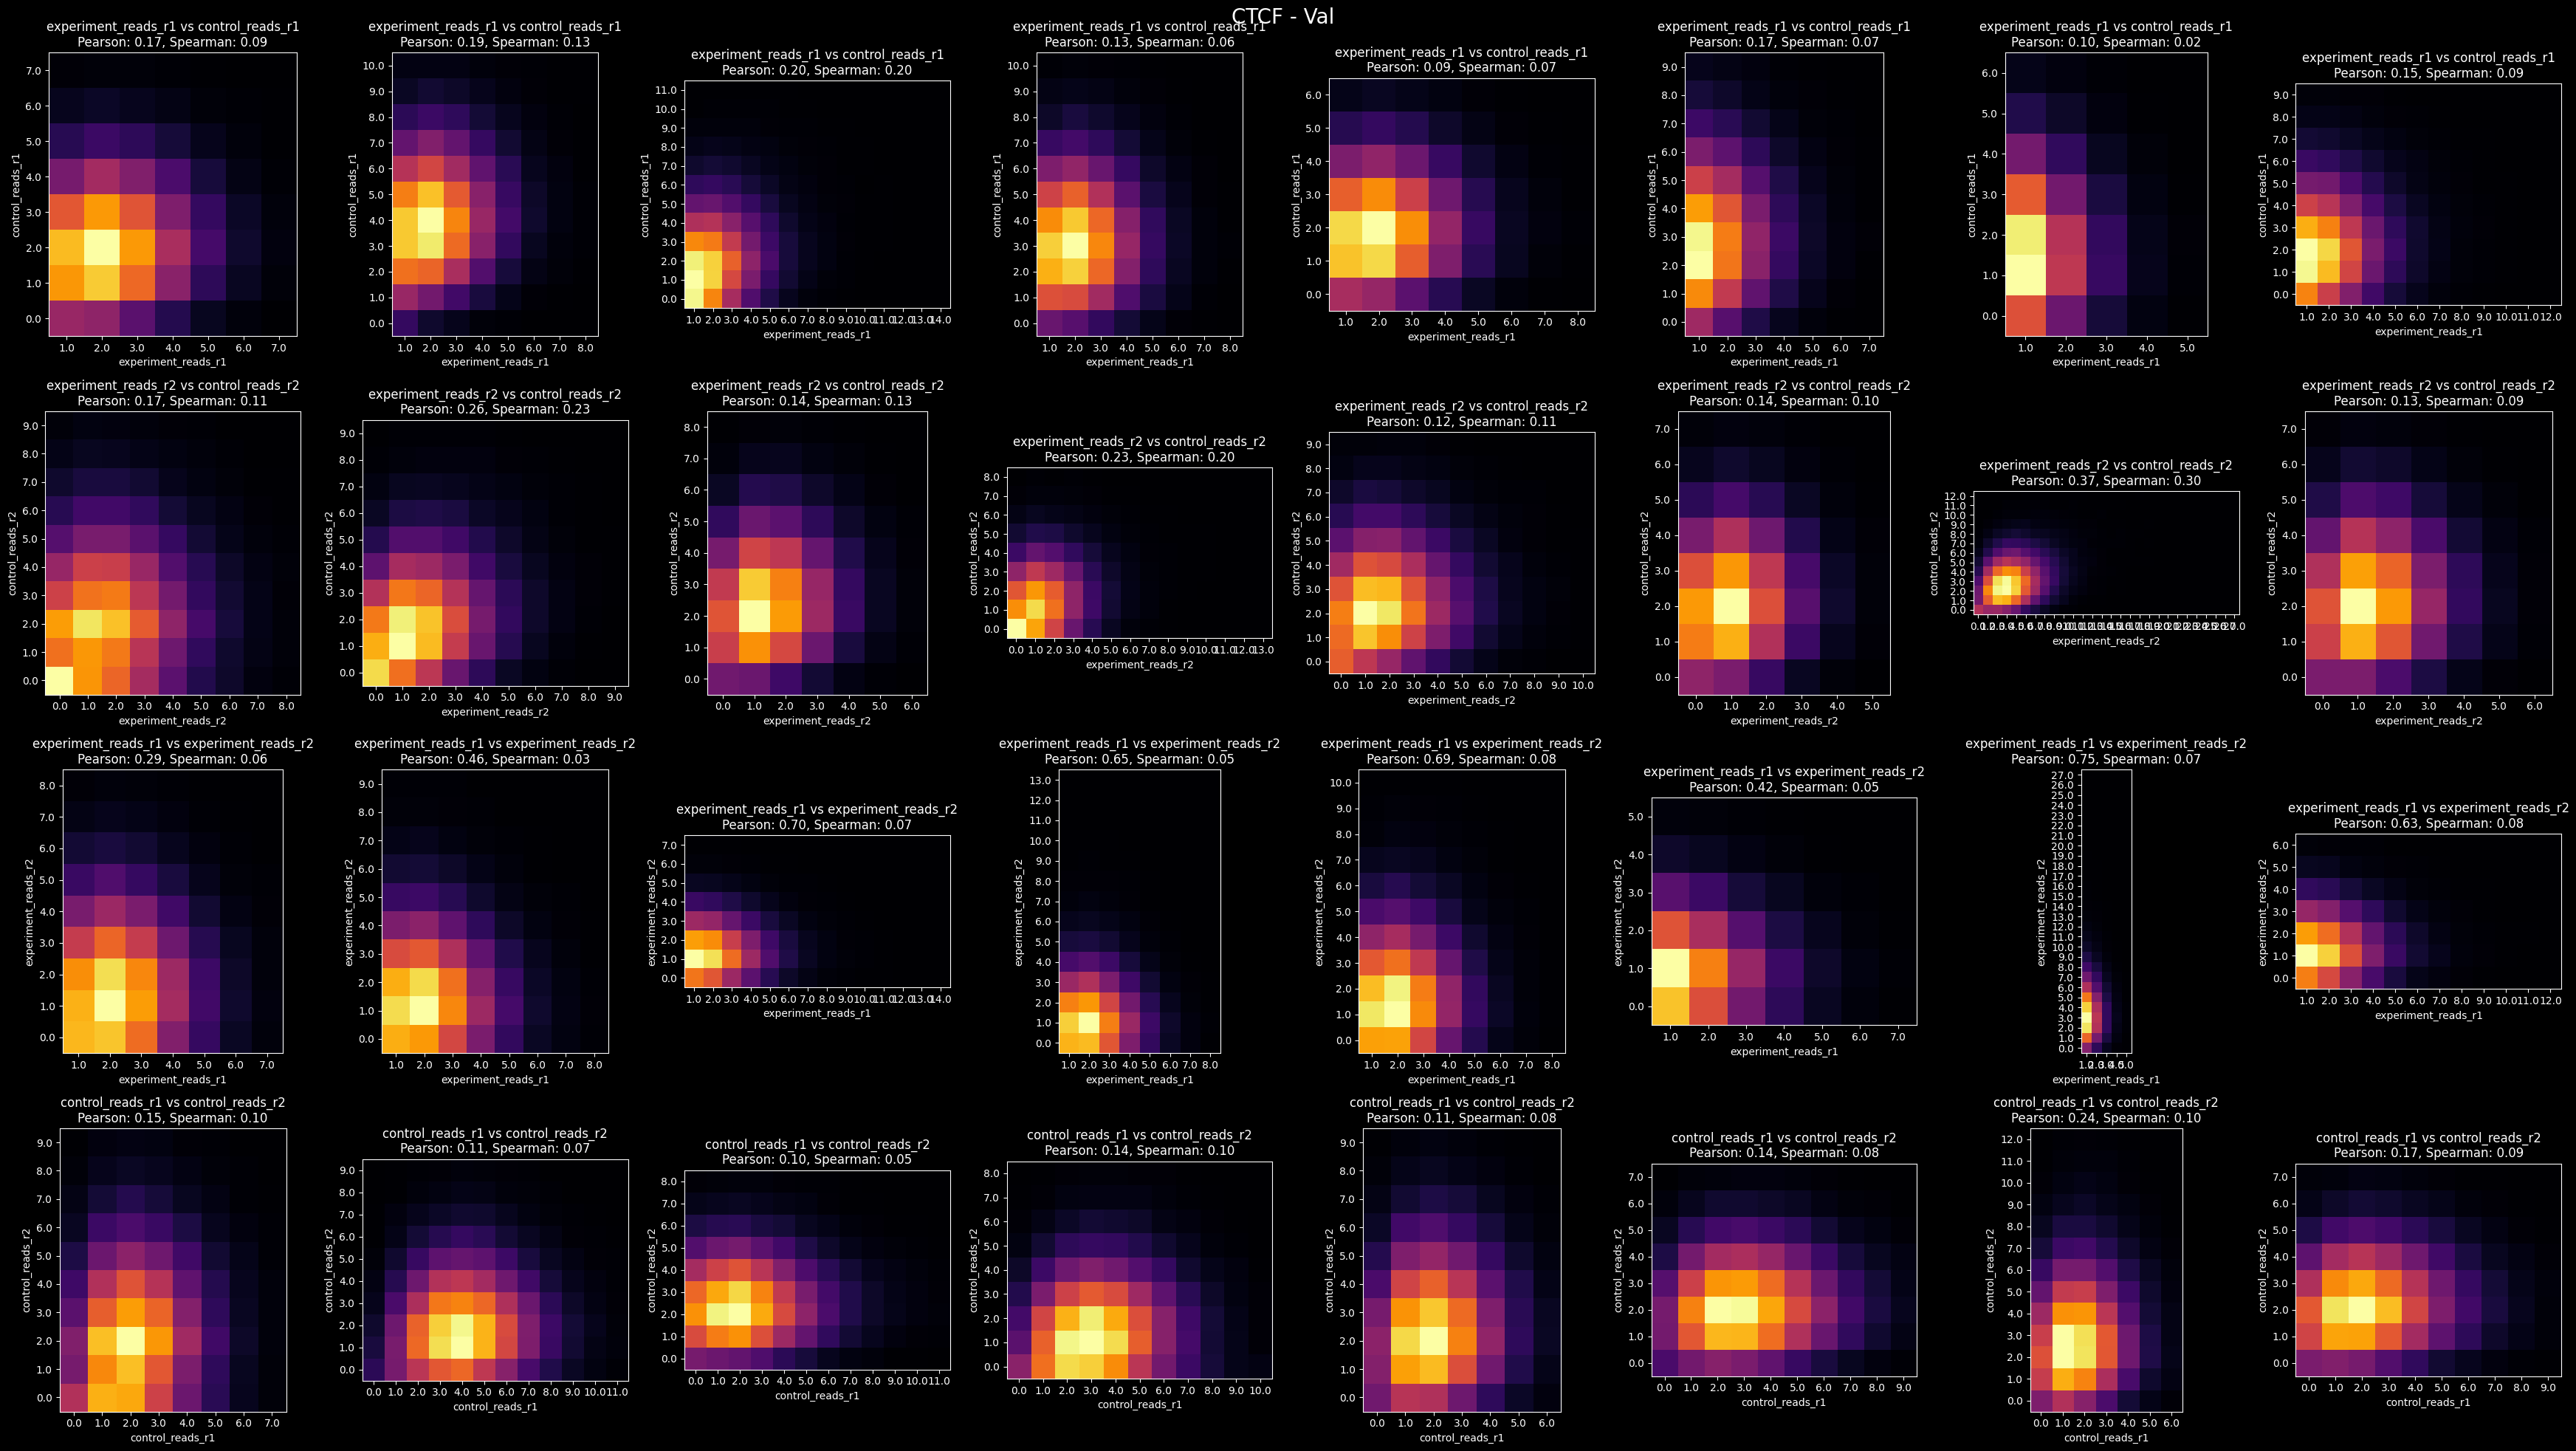

In [12]:
np.random.seed(42)

fig, axes = plt.subplots(4, val_df_c["grp"].nunique(), figsize=(35, 20))

for grp_idx, grp_df in val_df_c.groupby("grp"):
    grp_axes = axes[:, grp_idx].flatten()

    hist2d(grp_df, "experiment_reads_r1", "control_reads_r1", grp_axes[0])
    hist2d(grp_df, "experiment_reads_r2", "control_reads_r2", grp_axes[1])
    hist2d(grp_df, "experiment_reads_r1", "experiment_reads_r2", grp_axes[2])
    hist2d(grp_df, "control_reads_r1", "control_reads_r2", grp_axes[3])

fig.suptitle("CTCF - Val", fontsize=20)
fig.tight_layout()